In [1]:
import pandas as pd
import pickle

from gensim import corpora, models, matutils
from gensim.models.coherencemodel import CoherenceModel
import scipy.sparse

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from skills.data_preprocess.data.inputs import *
from skills.data_preprocess.data_transform import get_jd_dataframe, run_data_transform_pipeline, transform_syllabus_to_lda_model
from skills.data_preprocess.coherence_graph import compute_coherence_values

import plotly.express as px

import logging

import pyLDAvis
import pyLDAvis.gensim_models

In [2]:
f = open('../../skills/data_preprocess/data/inputs/ServiceCompanyJD.pickle', 'rb')
service_jd = pickle.load(f)
f.close()

In [3]:
company_names = list(service_jd.keys())
company_names.sort()

In [4]:
jd_df = get_jd_dataframe(service_jd)
jd_df.head()

description
Accenture  \n\nandlt;br or andgt; andlt;br or andgt; acce...
Capgemini  job description\n\ndata analysis and algorithm...
Cognizant  \nshiyamsundar n\n\nhiring lead for enterprise...
Deloitte   \ndata sciences\n\nas a data science candidate...
HCL        job role and responsibility:\n\n\n\n\n• develo...

In [5]:
data_dtm, cv = run_data_transform_pipeline(jd_df, True)
data_dtm.head()

#   +  + years’  aa  aaa  ab  abap  abap development  abilities  \
Accenture  2  0  12         2   0    0   0     8                 1         12   
Capgemini  0  5   0         0   0    0   0     0                 0          1   
Cognizant  2  0   4         0   0    0   0     0                 0          5   
Deloitte   2  4   2         0   8    2   2     0                 0         23   
HCL        2  0   0         0   0    0   4     0                 0          0   

           ...  zero  zigbee  zone  zones  zones attitude  ø  ø hands  ●  ﻿  \
Accenture  ...     2       0     0      7               1  0        0  0  0   
Capgemini  ...     2       0     0      0               0  0        0  0  0   
Cognizant  ...     0       0     0      0               0  0        0  0  0   
Deloitte   ...     3       0    12      8               0  0        0  0  4   
HCL        ...     0       0     0      0               0  0        0  0  1   

           ﻿ strong  
Accenture         0  
Capgemini         0  
Cognizant         0  
Deloitte          0  
HCL               0  

[5 rows x 9962 columns]

EXPLORATORY DATA ANALYSIS

In [5]:
data = data_dtm.transpose()
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
print(top_dict)

{'Accenture': [('intelligence', 884), ('statistical', 607), ('ai', 470), ('tech', 343), ('results', 314), ('regression', 311), ('scale', 309), ('statistics', 304), ('decision', 292), ('visualization', 282), ('configure', 269), ('data analysis', 263), ('learning', 262), ('issue', 255), ('economics', 255), ('large data', 246), ('sets', 243), ('outcomes', 242), ('configure business', 238), ('design configure', 238), ('tasks', 235), ('developer design', 230), ('data sets', 228), ('context', 224), ('marketing', 221), ('segmentation', 219), ('daily', 218), ('ai ml', 212), ('decisions', 206), ('act', 204)], 'Capgemini': [('servicenow', 81), ('configuration', 58), ('web', 49), ('sales', 49), ('javascript', 36), ('mq', 34), ('bi', 34), ('crm', 31), ('eai', 30), ('jms', 28), ('voice', 26), ('offshore', 26), ('bpm', 26), ('certification', 25), ('pega', 25), ('azure data', 24), ('frameworks', 24), ('prpc', 23), ('multi', 23), ('interpersonal', 22), ('series', 22), ('sitecore', 21), ('integrations'

In [6]:
for job_role, top_words in top_dict.items():
    print(job_role)
    print(', '.join([word for word, count in top_words[0:30]]))
    print('---')

Accenture
intelligence, statistical, ai, tech, results, regression, scale, statistics, decision, visualization, configure, data analysis, learning, issue, economics, large data, sets, outcomes, configure business, design configure, tasks, developer design, data sets, context, marketing, segmentation, daily, ai ml, decisions, act
---
Capgemini
servicenow, configuration, web, sales, javascript, mq, bi, crm, eai, jms, voice, offshore, bpm, certification, pega, azure data, frameworks, prpc, multi, interpersonal, series, sitecore, integrations, proficient, validation, account, itsm, testing, methodology, environments
---
Cognizant
glide, release, script, report, statistical, share, required, dependencies, review test, execution, eg, testing, box, test cases, consulting, metrics, status, results, scrum, tasks, lead, optimization, sprint, uat, risk, effort, prepare test, test execution, digital, test results
---
Deloitte
marketing, risk, core, market, opportunities, cyber, professionals, lear

In [6]:
tdm = data_dtm.transpose()
tdm.head()

sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

id2word = dict((v, k) for k, v in cv.vocabulary_.items())
texts = [[word for word in list(cv.vocabulary_.keys())]]
dictionary = corpora.Dictionary(texts)

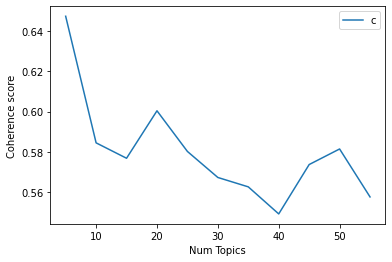

In [7]:
compute_coherence_values(id2word, dictionary, corpus, texts, limit=60, start=5, step=5)

In [18]:
import logging
logging.basicConfig(filename='lda.log',
                    format="%(asctime)s:%(levelname)s:%(message)s",
                    level=logging.INFO, force=True)

In [13]:
lda15 = models.LdaModel(corpus=corpus, num_topics=12, id2word=id2word, passes=150, iterations= 9000, chunksize = 20000, random_state=11)
lda15.print_topics(12,30)

[(0,
  '0.006*"web" + 0.005*"configuration" + 0.004*"collaboration" + 0.004*"certification" + 0.004*"teaming" + 0.004*"infrastructure" + 0.004*"decisions" + 0.004*"communicator" + 0.004*"development lifecycle" + 0.003*"software configuration" + 0.003*"develops" + 0.003*"complexity" + 0.003*"validation" + 0.003*"face" + 0.003*"innovative" + 0.003*"systematic" + 0.003*"situations" + 0.003*"self" + 0.003*"c#" + 0.003*"active" + 0.003*"linux" + 0.003*"efficient" + 0.003*"supervision" + 0.003*"verification" + 0.003*"continuous" + 0.003*"audience" + 0.003*"innovative solutions" + 0.003*"messages" + 0.003*"integral" + 0.003*"novel"'),
 (1,
  '0.005*"marketing" + 0.005*"risk" + 0.005*"core" + 0.004*"market" + 0.004*"opportunities" + 0.003*"cyber" + 0.003*"digital" + 0.003*"learning" + 0.003*"professionals" + 0.003*"growth" + 0.003*"strategic" + 0.003*"impact" + 0.003*"operational" + 0.003*"pm" + 0.003*"migration" + 0.003*"advisory" + 0.003*"public" + 0.003*"web" + 0.002*"entities" + 0.002*"pro

In [8]:
#Topics = 15
lda_15 = models.LdaModel(corpus=corpus, num_topics=15, id2word=id2word, passes=80, iterations= 9000, chunksize = 20000, random_state=11)
lda_15.print_topics(15,30)

[(0,
  '0.006*"consultancy" + 0.006*"spring" + 0.005*"web" + 0.005*"details" + 0.005*"education" + 0.004*"siebel" + 0.004*"appian" + 0.004*"acquisition" + 0.004*"pg" + 0.004*"boot" + 0.004*"spring boot" + 0.004*"configuration" + 0.003*"arena" + 0.003*"together" + 0.003*"must" + 0.003*"great" + 0.003*"leader" + 0.003*"fire" + 0.003*"pioneer" + 0.003*"java spring" + 0.003*"angular" + 0.003*"applicable" + 0.003*"pega" + 0.003*"rest" + 0.003*"subject" + 0.003*"share" + 0.003*"specialist" + 0.003*"big data" + 0.003*"testing" + 0.003*"email"'),
 (1,
  '0.000*"digital" + 0.000*"digital transformation" + 0.000*"logical" + 0.000*"estimation" + 0.000*"latest" + 0.000*"latest technologies" + 0.000*"deliverables" + 0.000*"detailed" + 0.000*"designs" + 0.000*"improvement" + 0.000*"public" + 0.000*"industry domain" + 0.000*"contribute" + 0.000*"identify" + 0.000*"objective" + 0.000*"current processes" + 0.000*"solutions digital" + 0.000*"detailed functional" + 0.000*"definition" + 0.000*"challenges"

In [11]:
#Coherence for 15 topics model
coherencemodel = CoherenceModel(model=lda_15, texts=texts, dictionary=dictionary, coherence='c_v')
print(coherencemodel.get_coherence())

0.6715967343522661


In [10]:
#Topics = 30; Final Model
lda_30 = models.LdaModel(corpus=corpus, num_topics=30, id2word=id2word, passes=100, iterations= 10000, chunksize = 20000, random_state=22)
lda_30.print_topics(30,30)

[(0,
  '0.009*"abinitio" + 0.006*"wpf" + 0.005*"prior" + 0.005*"ba" + 0.005*"finance" + 0.004*"analytic" + 0.004*"test automation" + 0.004*"external" + 0.004*"c#" + 0.004*"robot" + 0.004*"metrics" + 0.004*"bookings" + 0.004*"robot framework" + 0.004*"frameworks" + 0.004*"ui development" + 0.004*"ebs" + 0.004*"bugs" + 0.003*"ci" + 0.003*"ci cd" + 0.003*"cd" + 0.003*"presentation" + 0.003*"success" + 0.003*"uipath" + 0.003*"insightful" + 0.003*"interpersonal" + 0.003*"dataops" + 0.003*"demonstrate" + 0.003*"driven" + 0.003*"structures" + 0.003*"ms"'),
 (1,
  '0.000*"support maintenance" + 0.000*"standard" + 0.000*"independent" + 0.000*"maintenance" + 0.000*"module" + 0.000*"complex module" + 0.000*"capable" + 0.000*"developer development" + 0.000*"mentor" + 0.000*"development language" + 0.000*"tasks" + 0.000*"development support" + 0.000*"requests" + 0.000*"depth" + 0.000*"n" + 0.000*"maintenance implementation" + 0.000*"guide" + 0.000*"depth development" + 0.000*"availability" + 0.000*

In [9]:
f = open('models/lda30.pickle', 'rb')
lda_final = pickle.load(f)
f.close()

In [10]:
#Coherence for 30 topics model
coherencemodel = CoherenceModel(model=lda_final, texts=texts, dictionary=dictionary, coherence='c_v')
print(coherencemodel.get_coherence())

0.67470262133419


In [13]:
lda60 = models.LdaModel(corpus=corpus, num_topics=60, id2word=id2word, passes=100, iterations= 10000, chunksize = 20000, random_state=22)
lda60.print_topics(60,30)

[(0,
  '0.000*"abinitio" + 0.000*"wpf" + 0.000*"prior" + 0.000*"finance" + 0.000*"ebs" + 0.000*"ui development" + 0.000*"test automation" + 0.000*"agile development" + 0.000*"robot framework" + 0.000*"jenkins" + 0.000*"bookings" + 0.000*"analytic" + 0.000*"c#" + 0.000*"ba" + 0.000*"frameworks" + 0.000*"metrics" + 0.000*"design solid" + 0.000*"staff" + 0.000*"actionable" + 0.000*"ms" + 0.000*"participate agile" + 0.000*"interpersonal" + 0.000*"insightful" + 0.000*"investigate" + 0.000*"bugs" + 0.000*"small" + 0.000*"daily" + 0.000*"ai ml" + 0.000*"qa" + 0.000*"uipath"'),
 (1,
  '0.000*"pega" + 0.000*"azure data" + 0.000*"core" + 0.000*"api" + 0.000*"web" + 0.000*"factory" + 0.000*"data factory" + 0.000*"components" + 0.000*"css" + 0.000*"rest" + 0.000*"adobe" + 0.000*"scala" + 0.000*"structure" + 0.000*"roles" + 0.000*"cross" + 0.000*"js" + 0.000*"angular" + 0.000*"presentation" + 0.000*"devops" + 0.000*"pipeline" + 0.000*"scripts" + 0.000*"big data" + 0.000*"data analysis" + 0.000*"jav

In [14]:
#Coherence for 60 topics model
coherencemodel = CoherenceModel(model=lda60, texts=texts, dictionary=dictionary, coherence='c_v')
print(coherencemodel.get_coherence())

0.7280551100262562


In [ ]:
#Final Model is topics number 30
f = open('models/lda30.pickle', 'rb')
lda_final = pickle.load(f)
f.close()

In [15]:
def format_topics_companies(ldamodel=None, corpus=corpus, texts=data):
    '''Create Dominant Topic Per Company DataFrame'''
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num, 60)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_companies(ldamodel=lda_final, corpus=corpus, texts=texts)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Company', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords']
df_dominant_topic['Company'] = company_names
df_dominant_topic.head(10)

Company  Dominant_Topic  Topic_Perc_Contrib  \
0  Accenture            19.0              0.9838   
1  Capgemini            24.0              0.9513   
2  Cognizant            27.0              0.9997   
3   Deloitte            13.0              0.9921   
4        HCL             0.0              0.9994   
5  Honeywell             2.0              0.9372   
6    Infosys            29.0              0.9920   
7   MindTree            10.0              0.8963   
8        PWC            11.0              0.9985   
9      Wipro            18.0              1.0000   

                                            Keywords  
0  intelligence, statistical, ai, tech, results, ...  
1  servicenow, configuration, sales, web, mq, jav...  
2  glide, release, script, report, statistical, d...  
3  marketing, risk, core, market, opportunities, ...  
4  abinitio, wpf, prior, finance, ba, analytic, r...  
5  web, configuration, collaboration, certificati...  
6  digital, digital transformation, estimation, l...  
7  azure data, pega, web, factory, api, data fact...  
8  banking, banks, uat, end end, files, tech, end...  
9  module, maintenance, capable, development supp...

In [16]:
f = open('DominantTopicPerCompany.pickle', 'wb')
pickle.dump(df_dominant_topic, f)
f.close()

In [17]:
#This function can be used to get the topic terms of the most probable topic per company
def get_prominent_topic_terms(company, df):
    idx = df[df['Company']== company].index.values
    keywords = list(df.loc[idx, 'Keywords'])
    return keywords

SYLLABUS DATA PREDICTIONS 

Load model and make predictions on the CS syllabus 2018 and CS syllabus 2014 data

In [ ]:
result_syl_jd_topics18 = transform_syllabus_to_lda_model(lda_final, dictionary, '2018')
result_syl_jd_topics14 = transform_syllabus_to_lda_model(lda_final, dictionary, '2014')

with open('LdaServiceCom18.html', 'a') as plotfile:
  for key, value in result_syl_jd_topics18.items():
    plotfile.write(str(key))
    plotfile.write("\n\n")
    for topic, percentage in value.items():
        topic_list = lda_final.show_topic(topic, 30)
        fig = px.bar(x=[val[1] for val in topic_list], y=[val[0] for val in topic_list])
        plotfile.write(fig.to_html(full_html=False, include_plotlyjs=False))
        plotfile.write("\n\n")

with open('LdaServiceCom14.html', 'a') as plotfile:
  for key, value in result_syl_jd_topics14.items():
    plotfile.write(str(key))
    plotfile.write("\n\n")
    for topic, percentage in value.items():
        topic_list = lda_final.show_topic(topic, 30)
        fig = px.bar(x=[val[1] for val in topic_list], y=[val[0] for val in topic_list])
        plotfile.write(fig.to_html(full_html=False, include_plotlyjs=False))
        plotfile.write("\n\n")


TOPIC VISUALIZATION FOR JD MODEL

In [10]:
# Topic Visualization
pyLDAvis.enable_notebook()
viz = pyLDAvis.gensim_models.prepare(lda_final, corpus, dictionary, sort_topics=False)
viz

/Users/aproy/opt/miniconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/aproy/opt/miniconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


PreparedData(topic_coordinates=                        x                   y  topics  cluster       Freq
topic                                                                    
0      0.058952+0.000000j  0.058146+0.000000j       1        1   0.736723
1     -0.082626+0.000000j -0.002586+0.000000j       2        1   0.000154
2      0.185450+0.000000j  0.093549+0.000000j       3        1  17.131267
3     -0.030485+0.000000j -0.062451+0.000000j       4        1   0.175882
4     -0.082626+0.000000j -0.002586+0.000000j       5        1   0.000154
5     -0.082626+0.000000j -0.002586+0.000000j       6        1   0.000154
6     -0.082626+0.000000j -0.002586+0.000000j       7        1   0.000154
7     -0.082626+0.000000j -0.002586+0.000000j       8        1   0.000154
8     -0.082626+0.000000j -0.002586+0.000000j       9        1   0.000154
9      0.171801+0.000000j  0.117097+0.000000j      10        1   2.750508
10     0.153534+0.000000j  0.130793+0.000000j      11        1   6.647522
11    -0.086532+0.000000j  0.005782+0.000000j      12        1   0.263065
12    -0.082626+0.000000j -0.002586+0.000000j      13        1   0.000154
13     0.097425+0.000000j  0.016268+0.000000j      14        1  21.374687
14    -0.082626+0.000000j -0.002586+0.000000j      15        1   0.000154
15    -0.082626+0.000000j -0.002586+0.000000j      16        1   0.000154
16    -0.082625+0.000000j -0.002586+0.000000j      17        1   0.000154
17    -0.082626+0.000000j -0.002586+0.000000j      18        1   0.000154
18     0.210079+0.000000j  0.031932+0.000000j      19        1   9.443333
19     0.161977+0.000000j  0.033367+0.000000j      20        1  30.464749
20    -0.082626+0.000000j -0.002586+0.000000j      21        1   0.000154
21    -0.108679+0.000000j -0.005331+0.000000j      22        1   0.041370
22    -0.082626+0.000000j -0.002586+0.000000j      23        1   0.000154
23    -0.082626+0.000000j -0.002586+0.000000j      24        1   0.000154
24     0.164516+0.000000j  0.092906+0.000000j      25        1   3.315833
25    -0.082626+0.000000j -0.002586+0.000000j      26        1   0.000154
26    -0.127077+0.000000j -0.114667+0.000000j      27        1   1.100964
27     0.156926+0.000000j -0.012087+0.000000j      28        1   1.460251
28    -0.082626+0.000000j -0.002586+0.000000j      29        1   0.000154
29     0.314122+0.000000j -0.343924+0.000000j      30        1   5.091378, topic_info=              Term         Freq        Total Category  logprob  loglift
8576   statistical   682.000000   682.000000  Default  30.0000  30.0000
4793  intelligence  1007.000000  1007.000000  Default  29.0000  29.0000
3041       digital   683.000000   683.000000  Default  28.0000  28.0000
5403   maintenance   680.000000   680.000000  Default  27.0000  27.0000
1324       capable   444.000000   444.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
4509   improvement   134.218091   430.224687  Topic30  -4.5018   1.8128
6993      programs   120.977466   332.965029  Topic30  -4.6056   1.9652
1434    challenges   118.483110   363.511636  Topic30  -4.6265   1.8566
2597    definition   115.800688   249.876582  Topic30  -4.6494   2.2085
7061        public   113.638230   253.438250  Topic30  -4.6682   2.1755

[1967 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         1  0.169399        
0         4  0.084699        
0        12  0.084699        
0        14  0.169399        
0        19  0.084699        
...     ...       ...     ...
9951     14  0.758438  you’ll
9951     20  0.221211  you’ll
9951     28  0.015801  you’ll
9959     10  0.729706       ●
9959     19  0.243235       ●

[3612 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [11]:
pyLDAvis.save_html(viz, 'Viz.html')

WORDCLOUD FOR EACH TOPIC

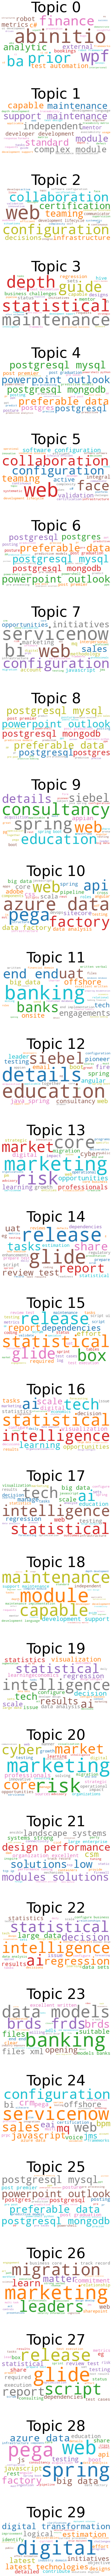

In [18]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  max_words=50,
                  colormap='tab10',
                  prefer_horizontal=1.0)

topics = lda_final.show_topics(num_topics=30, num_words=30, formatted=False)

fig, axes = plt.subplots(30, 1, figsize=(200,200))

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=70)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=80))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout(h_pad=10, w_pad=10)
plt.savefig('TopicWordCloud.pdf')
plt.show()